In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
f = "../data/temixco.csv"
tmx = pd.read_csv(f, index_col=0, parse_dates=True)
tmx.head()

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91


In [3]:
enero = tmx.loc["2018-01"].Ig

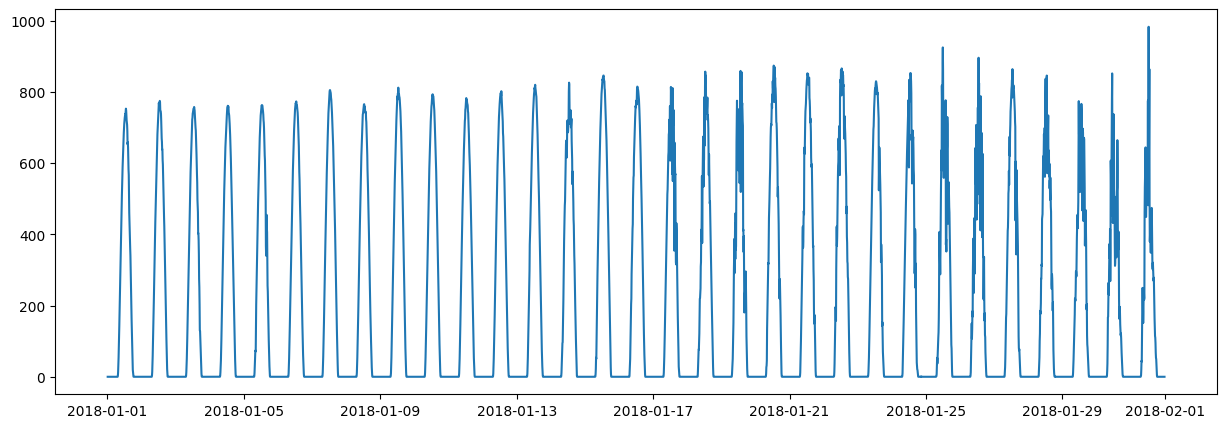

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(tmx.loc["2018-01"].Ig)
#ax.hlines(y=enero.mean(), xmin=enero.index[0], xmax=enero.index[-1])

In [5]:
Is = ["Ig","Ib"]
tmx[Is].resample("H").mean()

,Ig,Ib
time,,
2018-01-01 00:00:00,0.0,0.175800
2018-01-01 01:00:00,0.0,0.035500
2018-01-01 02:00:00,0.0,0.021833
2018-01-01 03:00:00,0.0,0.073333
2018-01-01 04:00:00,0.0,0.022000
...,...,...
2018-12-31 19:00:00,0.0,0.000000
2018-12-31 20:00:00,0.0,0.028167
2018-12-31 21:00:00,0.0,0.019500


In [6]:
dias_mean = tmx[Is].groupby(by=[tmx.index.hour]).mean()
dias_max  = tmx[Is].groupby(by=[tmx.index.hour]).max()
dias_min  = tmx[Is].groupby(by=[tmx.index.hour]).min()

<Axes: xlabel='time'>

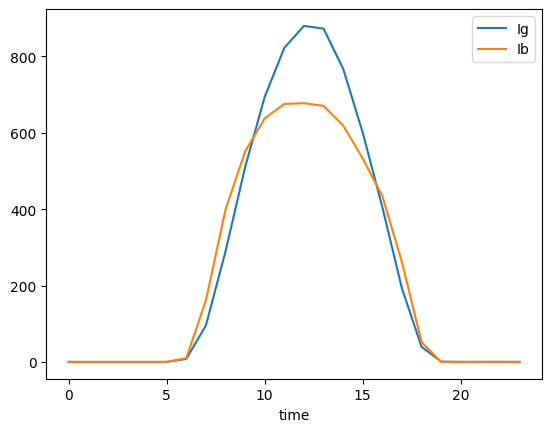

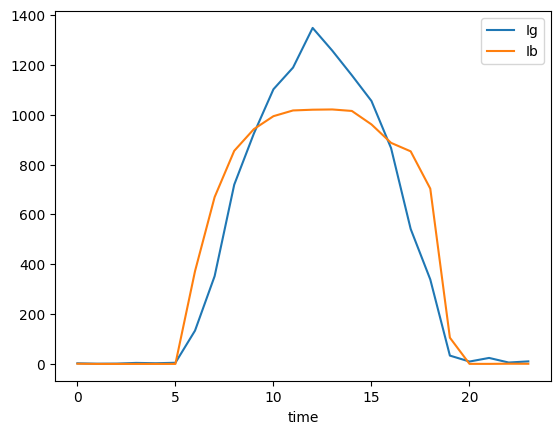

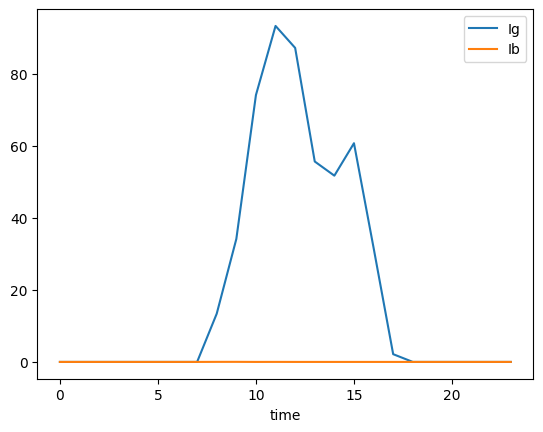

In [7]:
dias_mean.plot()
dias_max.plot()
dias_min.plot() 

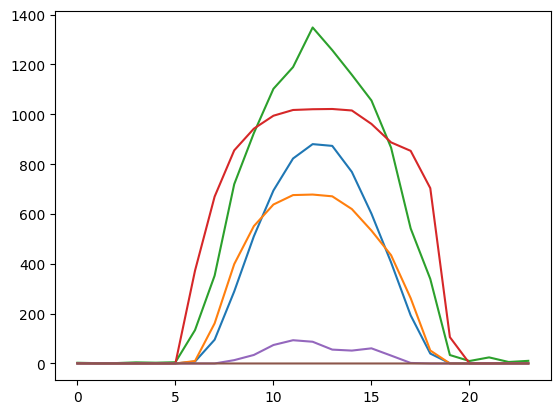

In [8]:
fig, ax = plt.subplots()
ax.plot(dias_mean)
ax.plot(dias_max)
ax.plot(dias_min)

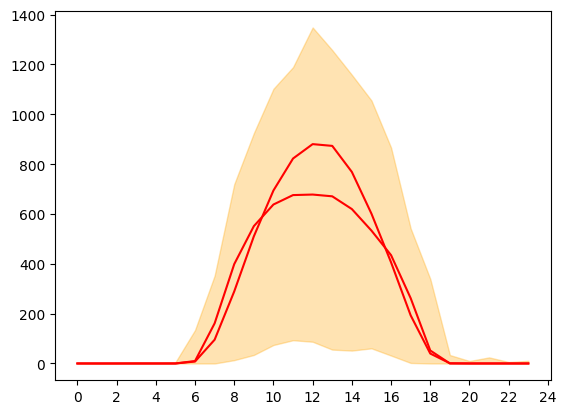

In [9]:
fig, ax = plt.subplots()
ax.fill_between(x=dias_mean.index, y1=dias_min.Ig, y2=dias_max.Ig, color="orange", alpha=0.3)
ax.plot(dias_mean, color="red")
ax.set_xticks(np.arange(0,25,2));
ax.set_xticklabels(np.arange(0,25,2));

In [10]:
dias_mean = tmx.groupby(by=(tmx.index.strftime("%H:%M"))).mean()
dias_max  = tmx.groupby(by=(tmx.index.strftime("%H:%M"))).max()
dias_min  = tmx.groupby(by=(tmx.index.strftime("%H:%M"))).min()

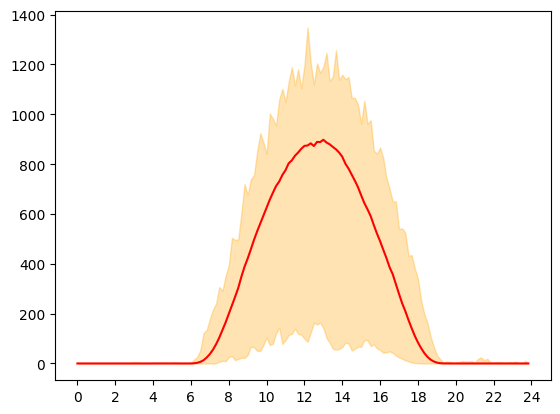

In [11]:
fig, ax = plt.subplots()
ax.fill_between(x=dias_mean.index, y1=dias_min.Ig, y2=dias_max.Ig, color="orange", alpha=0.3)
ax.plot(dias_mean.Ig, color="red")
ax.set_xticks(np.arange(0,145,12));
ax.set_xticklabels(np.arange(0,25,2));
